In [1]:
# Import libraries

# import numpy as np
# import pandas as pd
# import scipy as sp
# import matplotlib.pyplot as plt
# import seaborn as sns

import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from patsy import dmatrix
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from scipy import stats
from statsmodels.graphics import utils
from statsmodels.stats.outliers_influence import variance_inflation_factor as vifval

# Import the functions used in this project
import my_functions as mf 

from datetime import datetime
from dateutil.parser import parse

# Pretty display for notebooks
%matplotlib inline


# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("asset/train.csv")
test = pd.read_csv("asset/test.csv")
weather = pd.read_csv("asset/weather.csv")
key = pd.read_csv("asset/key.csv")
submission = pd.read_csv("asset/sampleSubmission.csv")

import pickle as pkl

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission.shape)

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_test = test.copy()
df_weather = weather.copy()
df_key = key.copy()
df_submission = submission.copy()

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [2]:
df = pkl.load(open("preprocess_date.pkl", "rb"))

In [4]:
def getFormula(df, categorical_columns, target_column):
    """
        df : 회귀분석할 df
        categorical_columns : 카테고리 컬럼명 리스트
        target_column : target column명 문자열
    """
    columns = df.columns
    formula = target_column + " ~ "
    for i, column in enumerate(columns):
        if column != target_column:
            if i != 0:
                formula += " + "
            if column in categorical_columns:
                formula += "C(" + column + ")"
            else:
                formula += str(column)
    return formula

In [5]:
df.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'log1p', 'date2',
       'station_nbr', 'preciptotal_flag', 'depart_flag', 'weekday',
       'is_weekend', 'is_holiday', 'is_holiday_weekday', 'is_holiday_weekend',
       'day', 'month', 'year', 'holiday_name', 'around_BlackFriday'],
      dtype='object')

In [3]:
model = sm.OLS.from_formula("units ~ C(store_nbr) + C(item_nbr) + 0", data=df)

In [4]:
result = model.fit()

In [5]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     2574.
Date:                Wed, 11 Jul 2018   Prob (F-statistic):               0.00
Time:                        15:23:43   Log-Likelihood:            -1.0858e+06
No. Observations:              236038   AIC:                         2.172e+06
Df Residuals:                  235883   BIC:                         2.174e+06
Df Model:                         154                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(store_nbr)[1]       33.8813      1

In [9]:
store_item = df[["store_nbr", "item_nbr"]]

In [16]:
df[df["units"] > 1000]

,date,store_nbr,item_nbr,units,log1p,date2,station_nbr,preciptotal_flag,depart_flag,weekday,is_weekend,is_holiday,is_holiday_weekday,is_holiday_weekend,day,month,year,holiday_name,around_BlackFriday
161826,2012-11-15,37,5,5568,8.624971,2012-11-15,13,0.0,0.0,3,0,0,0,0,15,11,2012,,Else
174570,2013-11-21,37,5,3369,8.122668,2013-11-21,13,0.0,0.0,3,0,0,0,0,21,11,2013,,Else


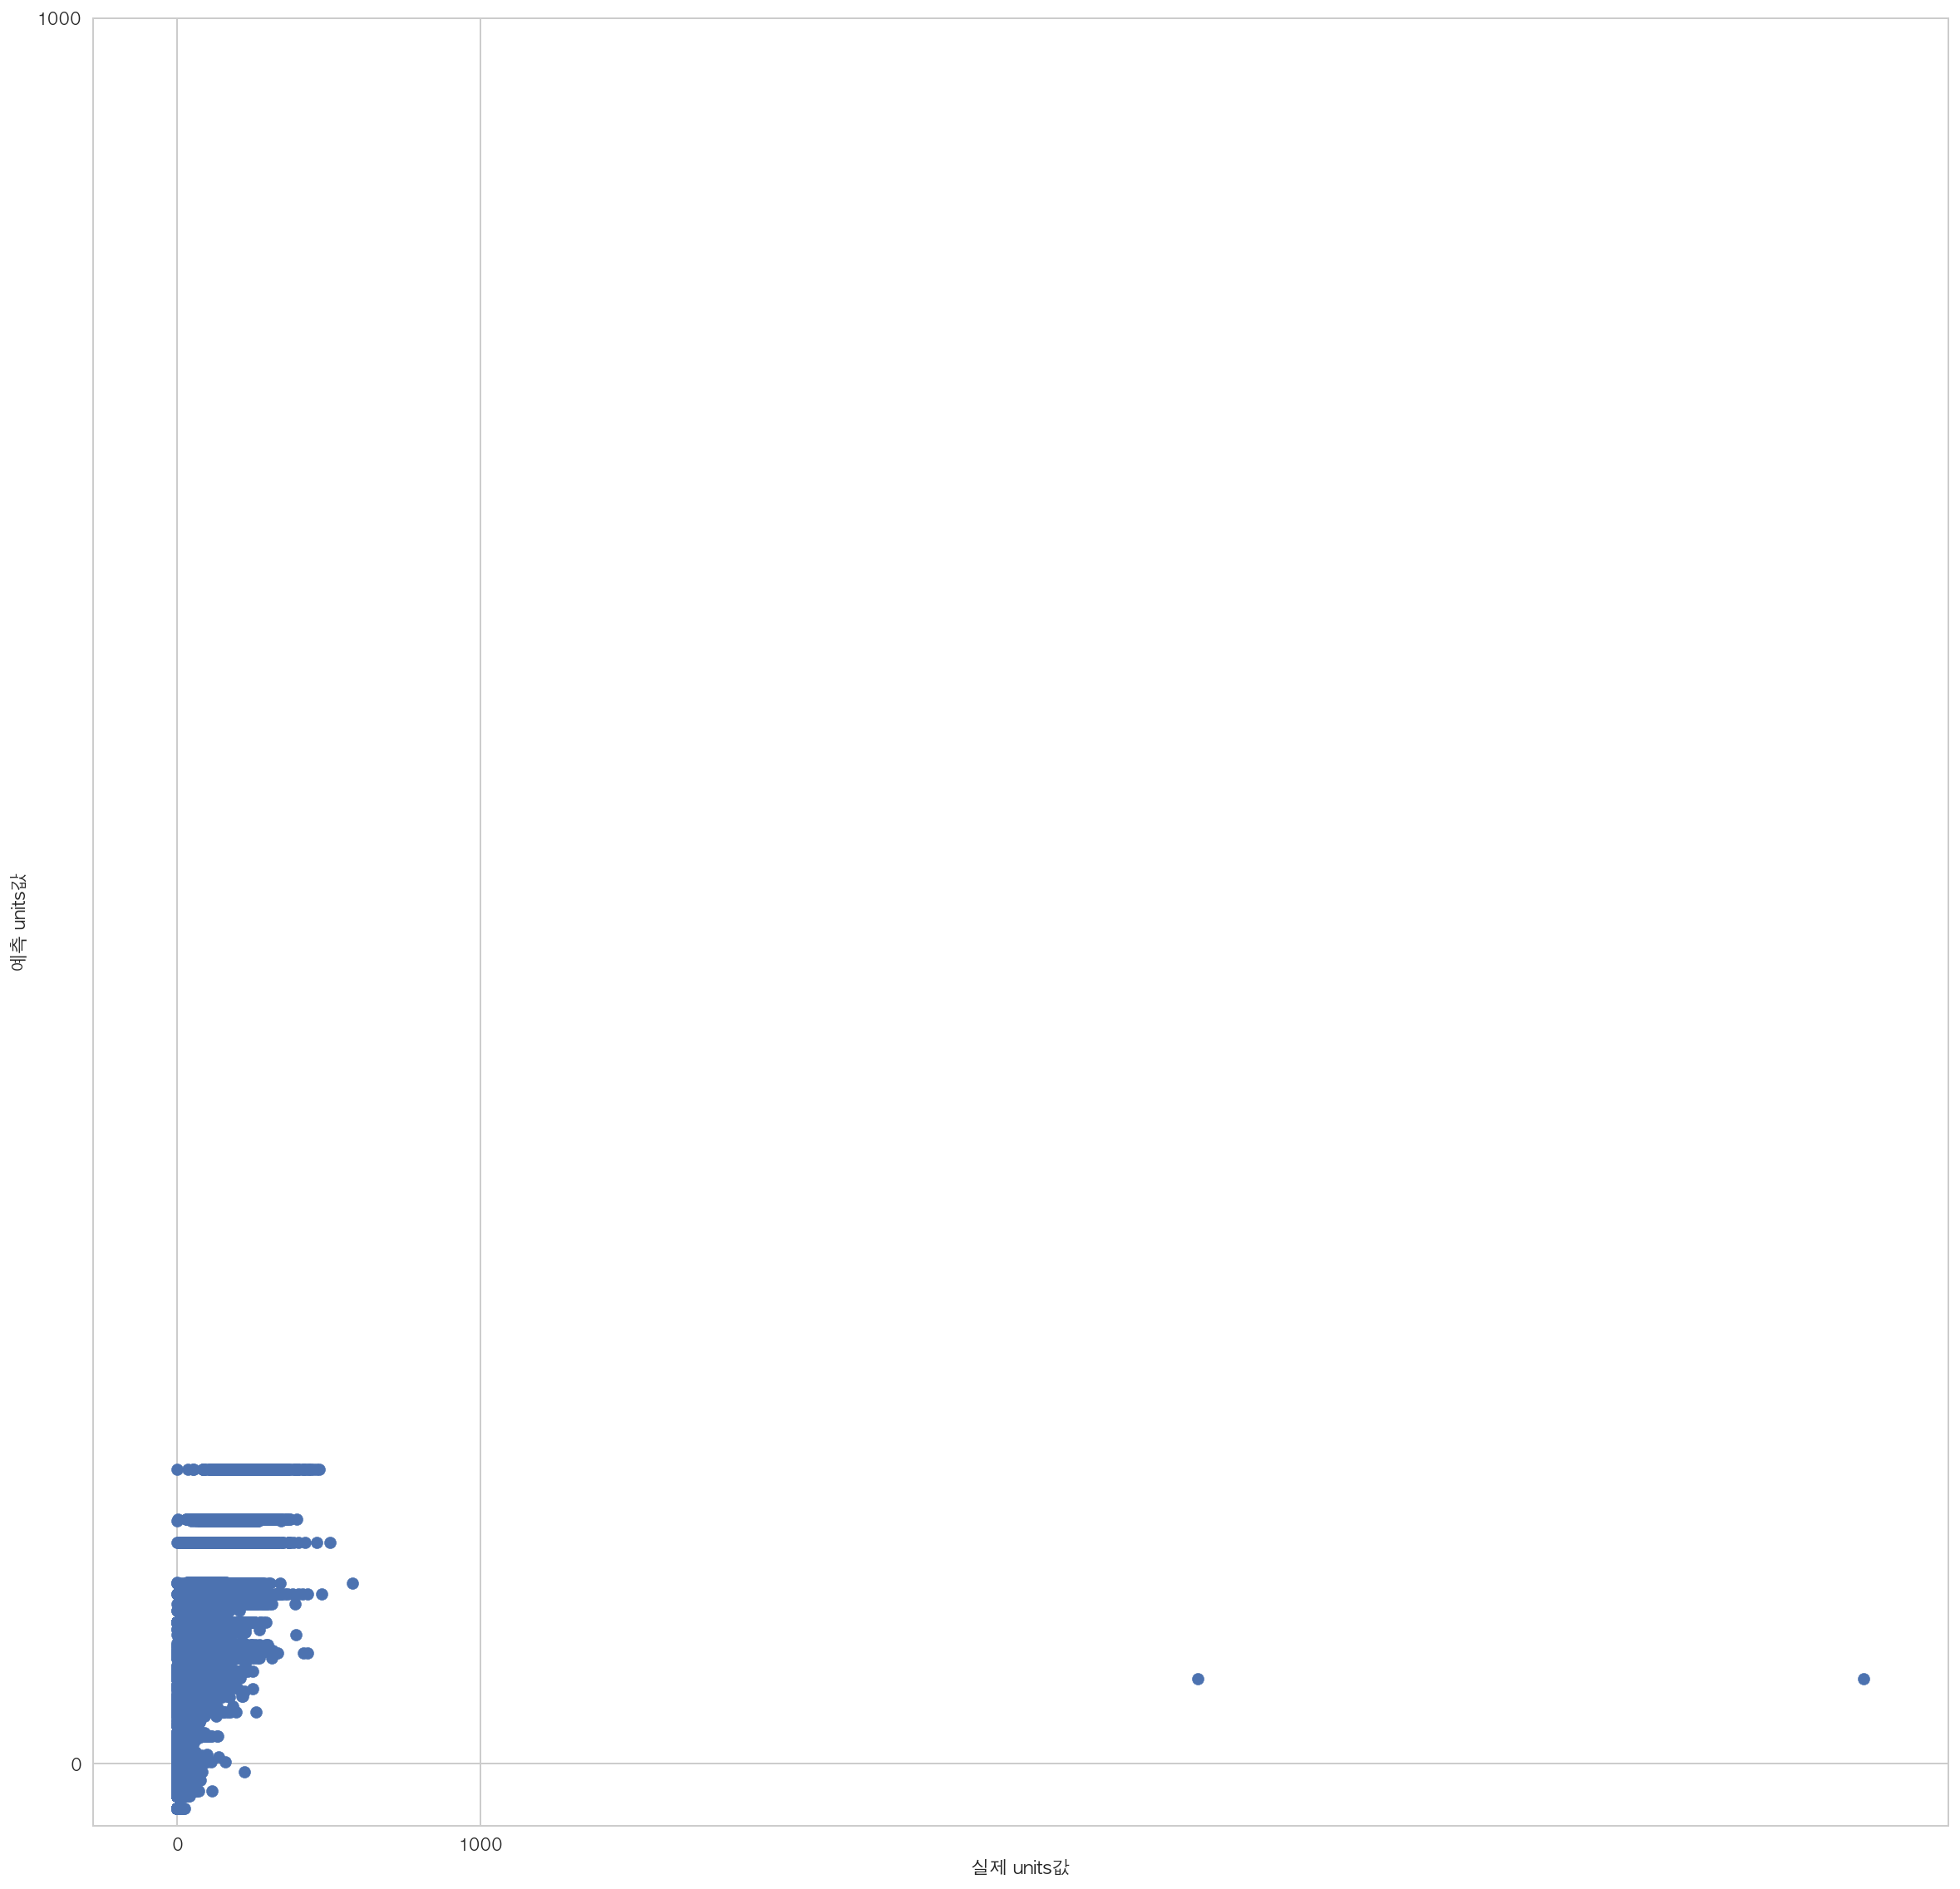

In [15]:
ynew = result.predict(store_item)
plt.figure(figsize=(20, 20))
plt.scatter(df["units"], ynew)
plt.xticks([0, 1000])
plt.yticks([0, 1000])
plt.xlabel(u"실제 units값")
plt.ylabel(u"예측 units값")
plt.show()

In [25]:
df.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'log1p', 'date2',
       'station_nbr', 'preciptotal_flag', 'depart_flag', 'weekday',
       'is_weekend', 'is_holiday', 'is_holiday_weekday', 'is_holiday_weekend',
       'day', 'month', 'year', 'holiday_name', 'around_BlackFriday'],
      dtype='object')

In [26]:
model = sm.OLS.from_formula("log1p ~ C(item_nbr):C(weekday) + 0", data = df)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1766.
Date:                Tue, 10 Jul 2018   Prob (F-statistic):               0.00
Time:                        16:37:39   Log-Likelihood:            -2.4141e+05
No. Observations:              236038   AIC:                         4.844e+05
Df Residuals:                  235261   BIC:                         4.924e+05
Df Model:                         776                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
C(item_nbr)[

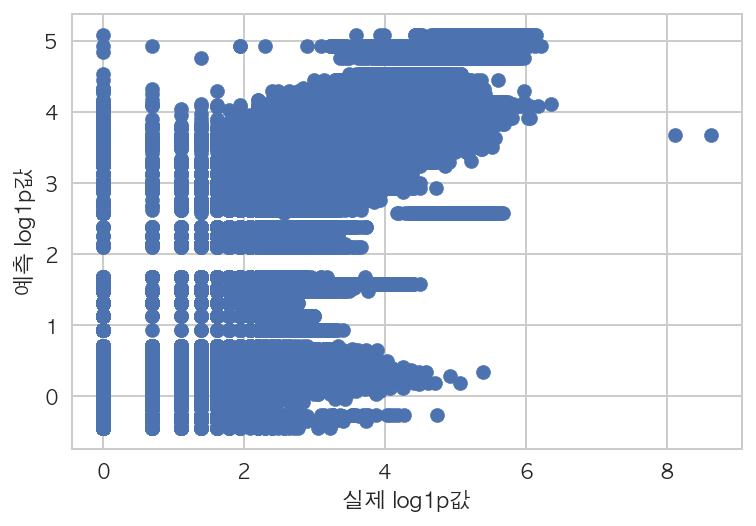

In [27]:
ynew = result.predict(store_item)
plt.scatter(df["log1p"], ynew)
plt.xlabel(u"실제 log1p값")
plt.ylabel(u"예측 log1p값")
plt.show()

In [88]:
df.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'log1p', 'date2',
       'station_nbr', 'preciptotal_flag', 'depart_flag', 'weekday',
       'is_weekend', 'is_holiday', 'is_holiday_weekday', 'is_holiday_weekend',
       'day', 'month', 'year', 'holiday_name', 'around_BlackFriday'],
      dtype='object')

In [93]:
store_item = pd.DataFrame(dmatrix("C(store_nbr) + 0", data=df))

In [92]:
store_item.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
matrix_df_1 = pd.DataFrame(dmatrix("C(store_nbr) - 1", data=df))

In [22]:
matrix_df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
df.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'log1p', 'date2',
       'station_nbr', 'preciptotal_flag', 'depart_flag', 'weekday',
       'is_weekend', 'is_holiday', 'is_holiday_weekday', 'is_holiday_weekend',
       'day', 'month', 'year', 'holiday_name', 'around_BlackFriday'],
      dtype='object')

In [129]:
matrix_df_ = pd.DataFrame(dmatrix("C(month) : C(item_nbr) + C(store_nbr) : C(item_nbr) + 0", data=df))

In [56]:
matrix_df = pd.DataFrame(dmatrix("C(store_nbr) + C(store_nbr) : C(item_nbr) + 0", data=df))

In [57]:
matrix_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
count = 0
li = []
for column in matrix_df.columns:
    sum_of_data_by_column = matrix_df[column].sum()
    if sum_of_data_by_column == 0:
        count += 1
    else:
        li.append(column)
count

4696

In [59]:
len(li)

299

In [123]:
matrix_df_ = matrix_df[li]

In [124]:
len(matrix_df_.columns)

299

In [30]:
matrix_df_.head()

,35,47,70,72,132,179,181,182,186,187,...,4722,4723,4744,4764,4775,4855,4862,4880,4915,4988
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 컬럼의 의미: 한 스토어당 111개의 아이템을 바라보게 되므로 원래는 111 * 45인 4995개의 컬럼이 만들어지지만,
### 스토어별로 팔린아이템넘버와 interaction된 컬럼만 남게되므로 총 255개가 남는다.
### 35번의 의미는 1번 스토어의 36번 아이템을 의미한다.

In [125]:
model = sm.OLS(df["log1p"], matrix_df_)

In [126]:
result = model.fit()

In [127]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     7152.
Date:                Fri, 13 Jul 2018   Prob (F-statistic):               0.00
Time:                        19:28:39   Log-Likelihood:            -2.1270e+05
No. Observations:              236038   AIC:                         4.259e+05
Df Residuals:                  235783   BIC:                         4.286e+05
Df Model:                         254                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0          -7.889e+09   5.99e+10     -0.132      0.8

In [66]:
model = sm.OLS(df["log1p"], matrix_df_)

In [52]:
len(matrix_df_)

236038

In [67]:
result = model.fit()

In [38]:
len(df)

236038

In [71]:
len(df[(df["store_nbr"] == 36) & (df["item_nbr"] == 1)])

964

## 아래의 셀에서 확인가능한 사실은 C(store_nbr):C(item_nbr) 로 나온 가중치의 의미는
## 팔린 총 개수 / 우리가 가진 날(day) 수

In [73]:
df[(df["store_nbr"] == 36) & (df["item_nbr"] == 1)]["log1p"].sum()/964

0.36762786964021665

In [60]:
sum(matrix_df_[35])

964.0

In [25]:
sum(matrix_df_[35])/len(matrix_df_[35])

0.004084088155297028

In [68]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     7158.
Date:                Fri, 13 Jul 2018   Prob (F-statistic):               0.00
Time:                        18:53:55   Log-Likelihood:            -2.1261e+05
No. Observations:              236038   AIC:                         4.257e+05
Df Residuals:                  235783   BIC:                         4.284e+05
Df Model:                         254                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
35             0.3676      0.019     19.154      0.0

In [49]:
test_df = pd.DataFrame(dmatrix("C(store_nbr) : C(item_nbr) + 0", data=test))

In [99]:
ynew = result.predict(matrix_df_)

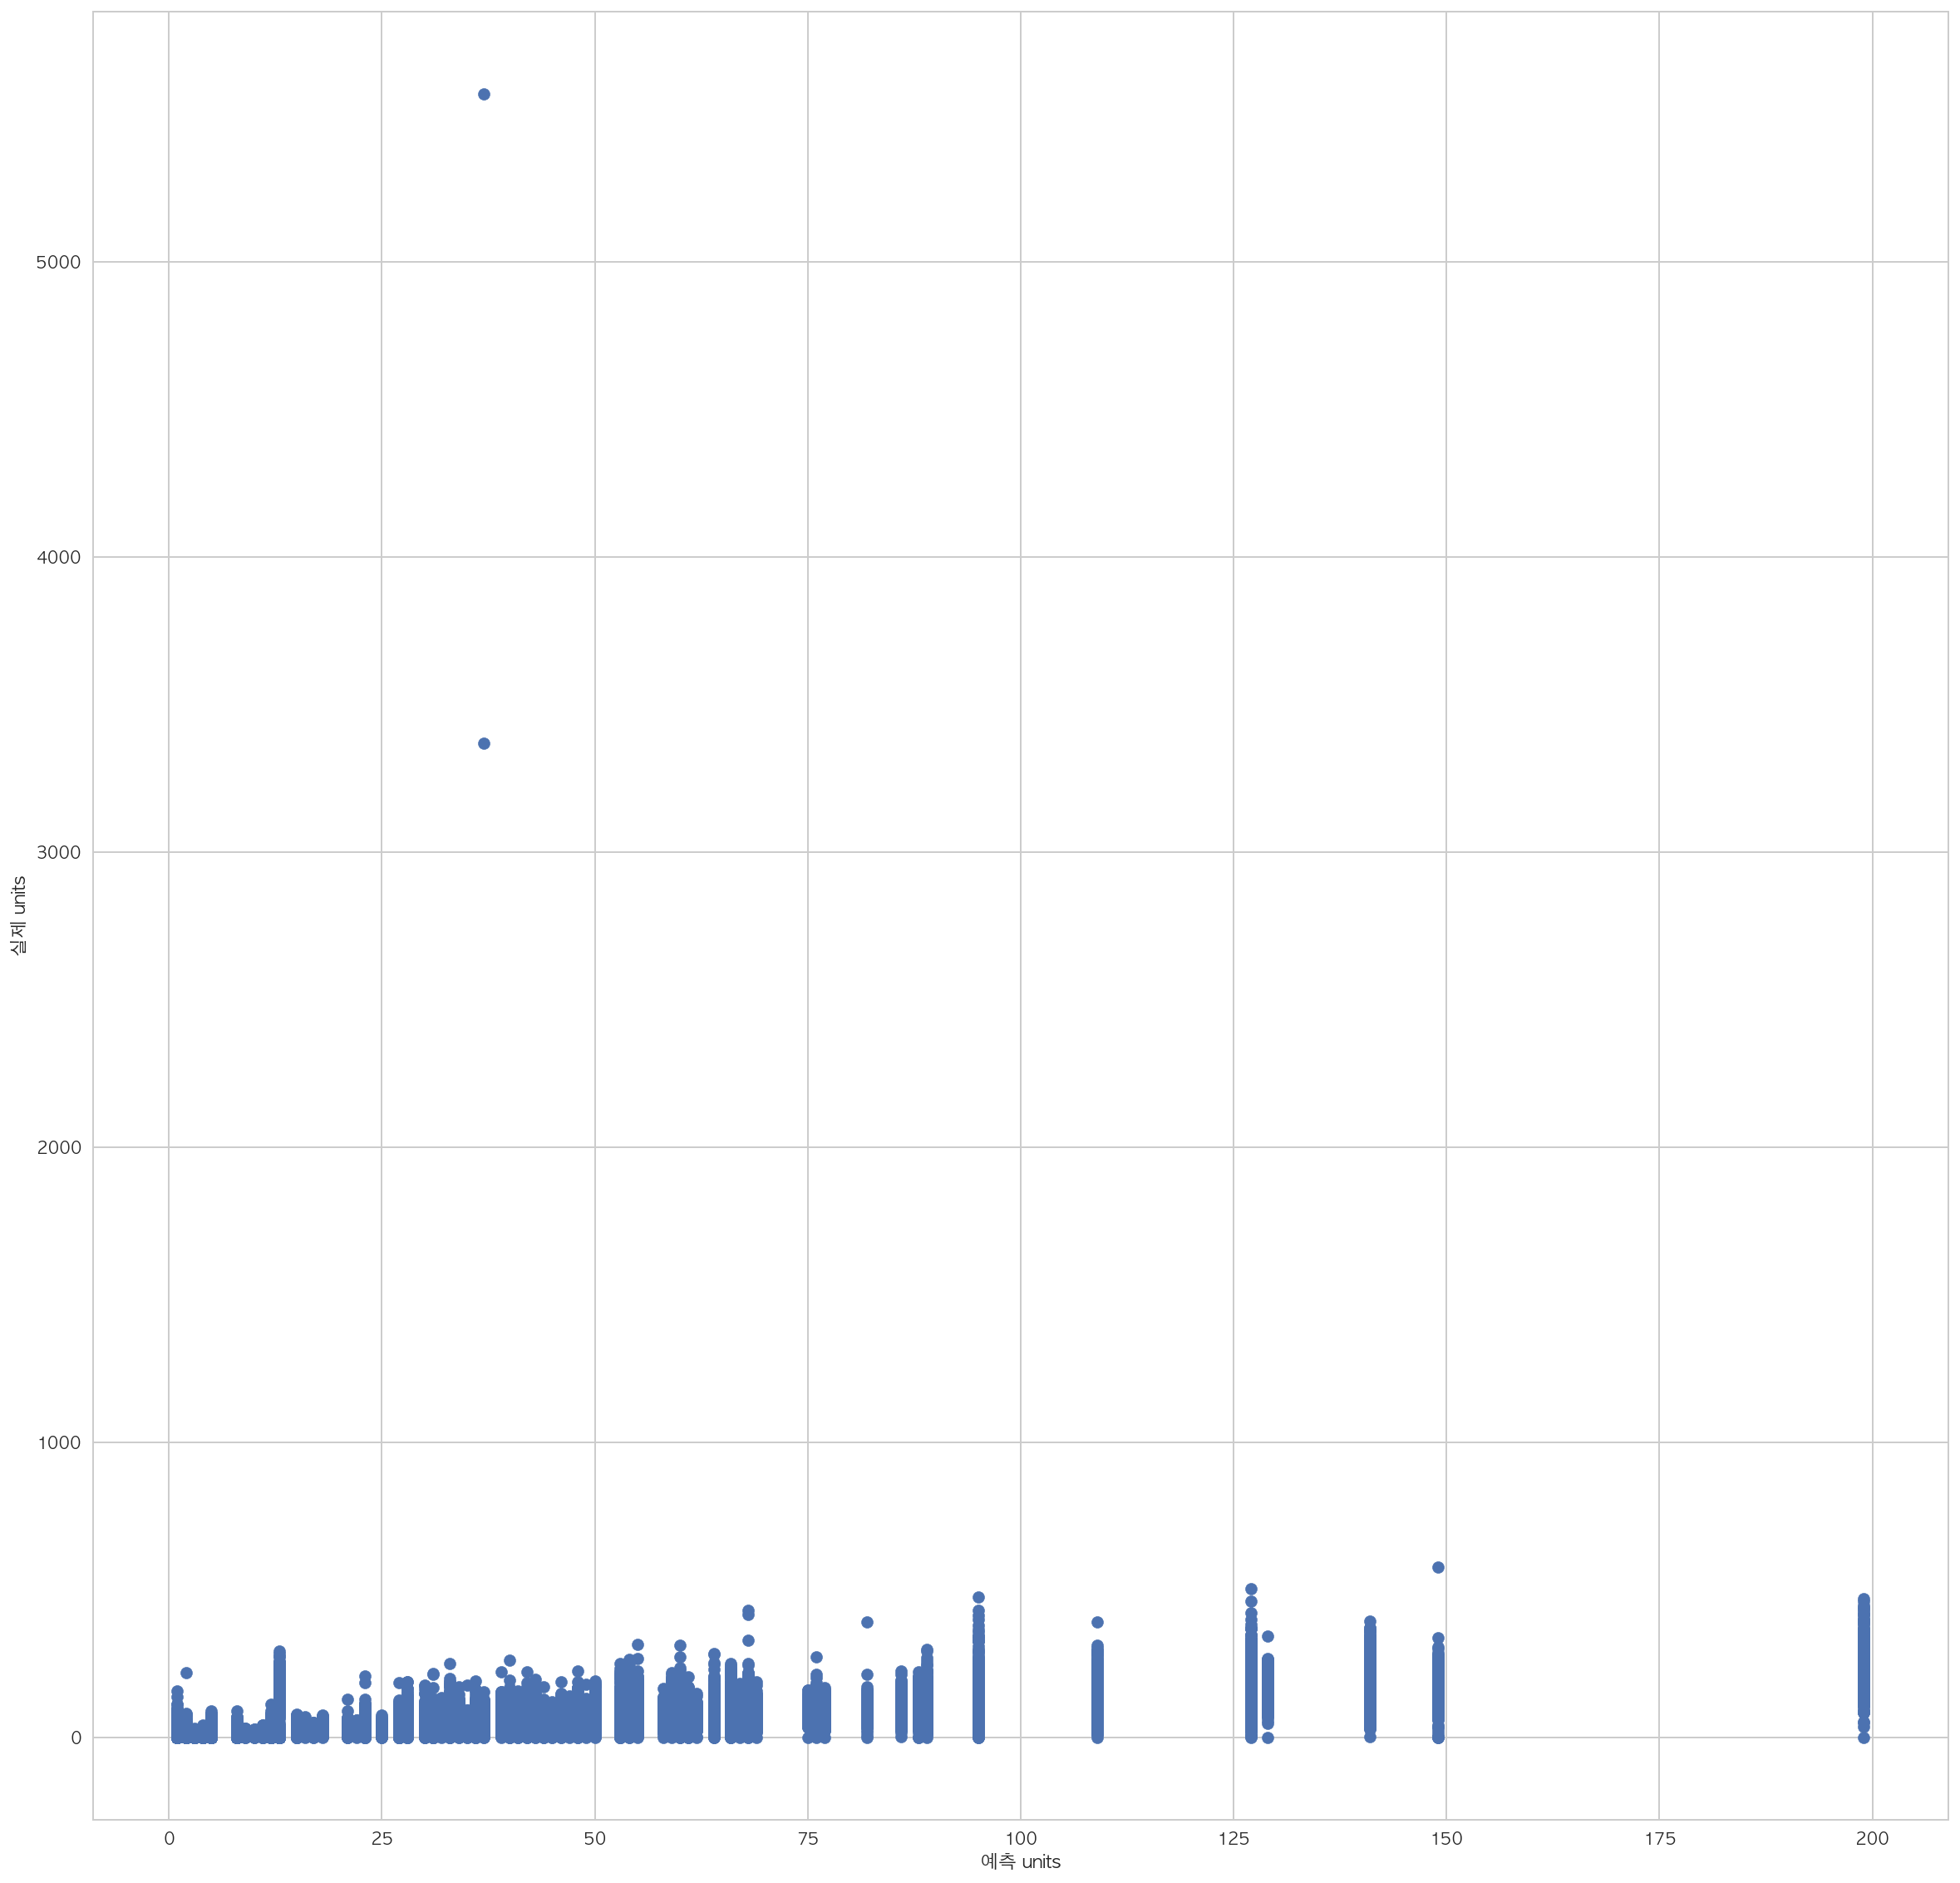

In [118]:
plt.figure(figsize=(20, 20))
# plt.scatter(np.exp(df["log1p"]), round(np.exp(ynew)))
plt.scatter(round(np.exp(ynew)), np.exp(df["log1p"]))
plt.ylabel(u"실제 units")
plt.xlabel(u"예측 units")
plt.show()

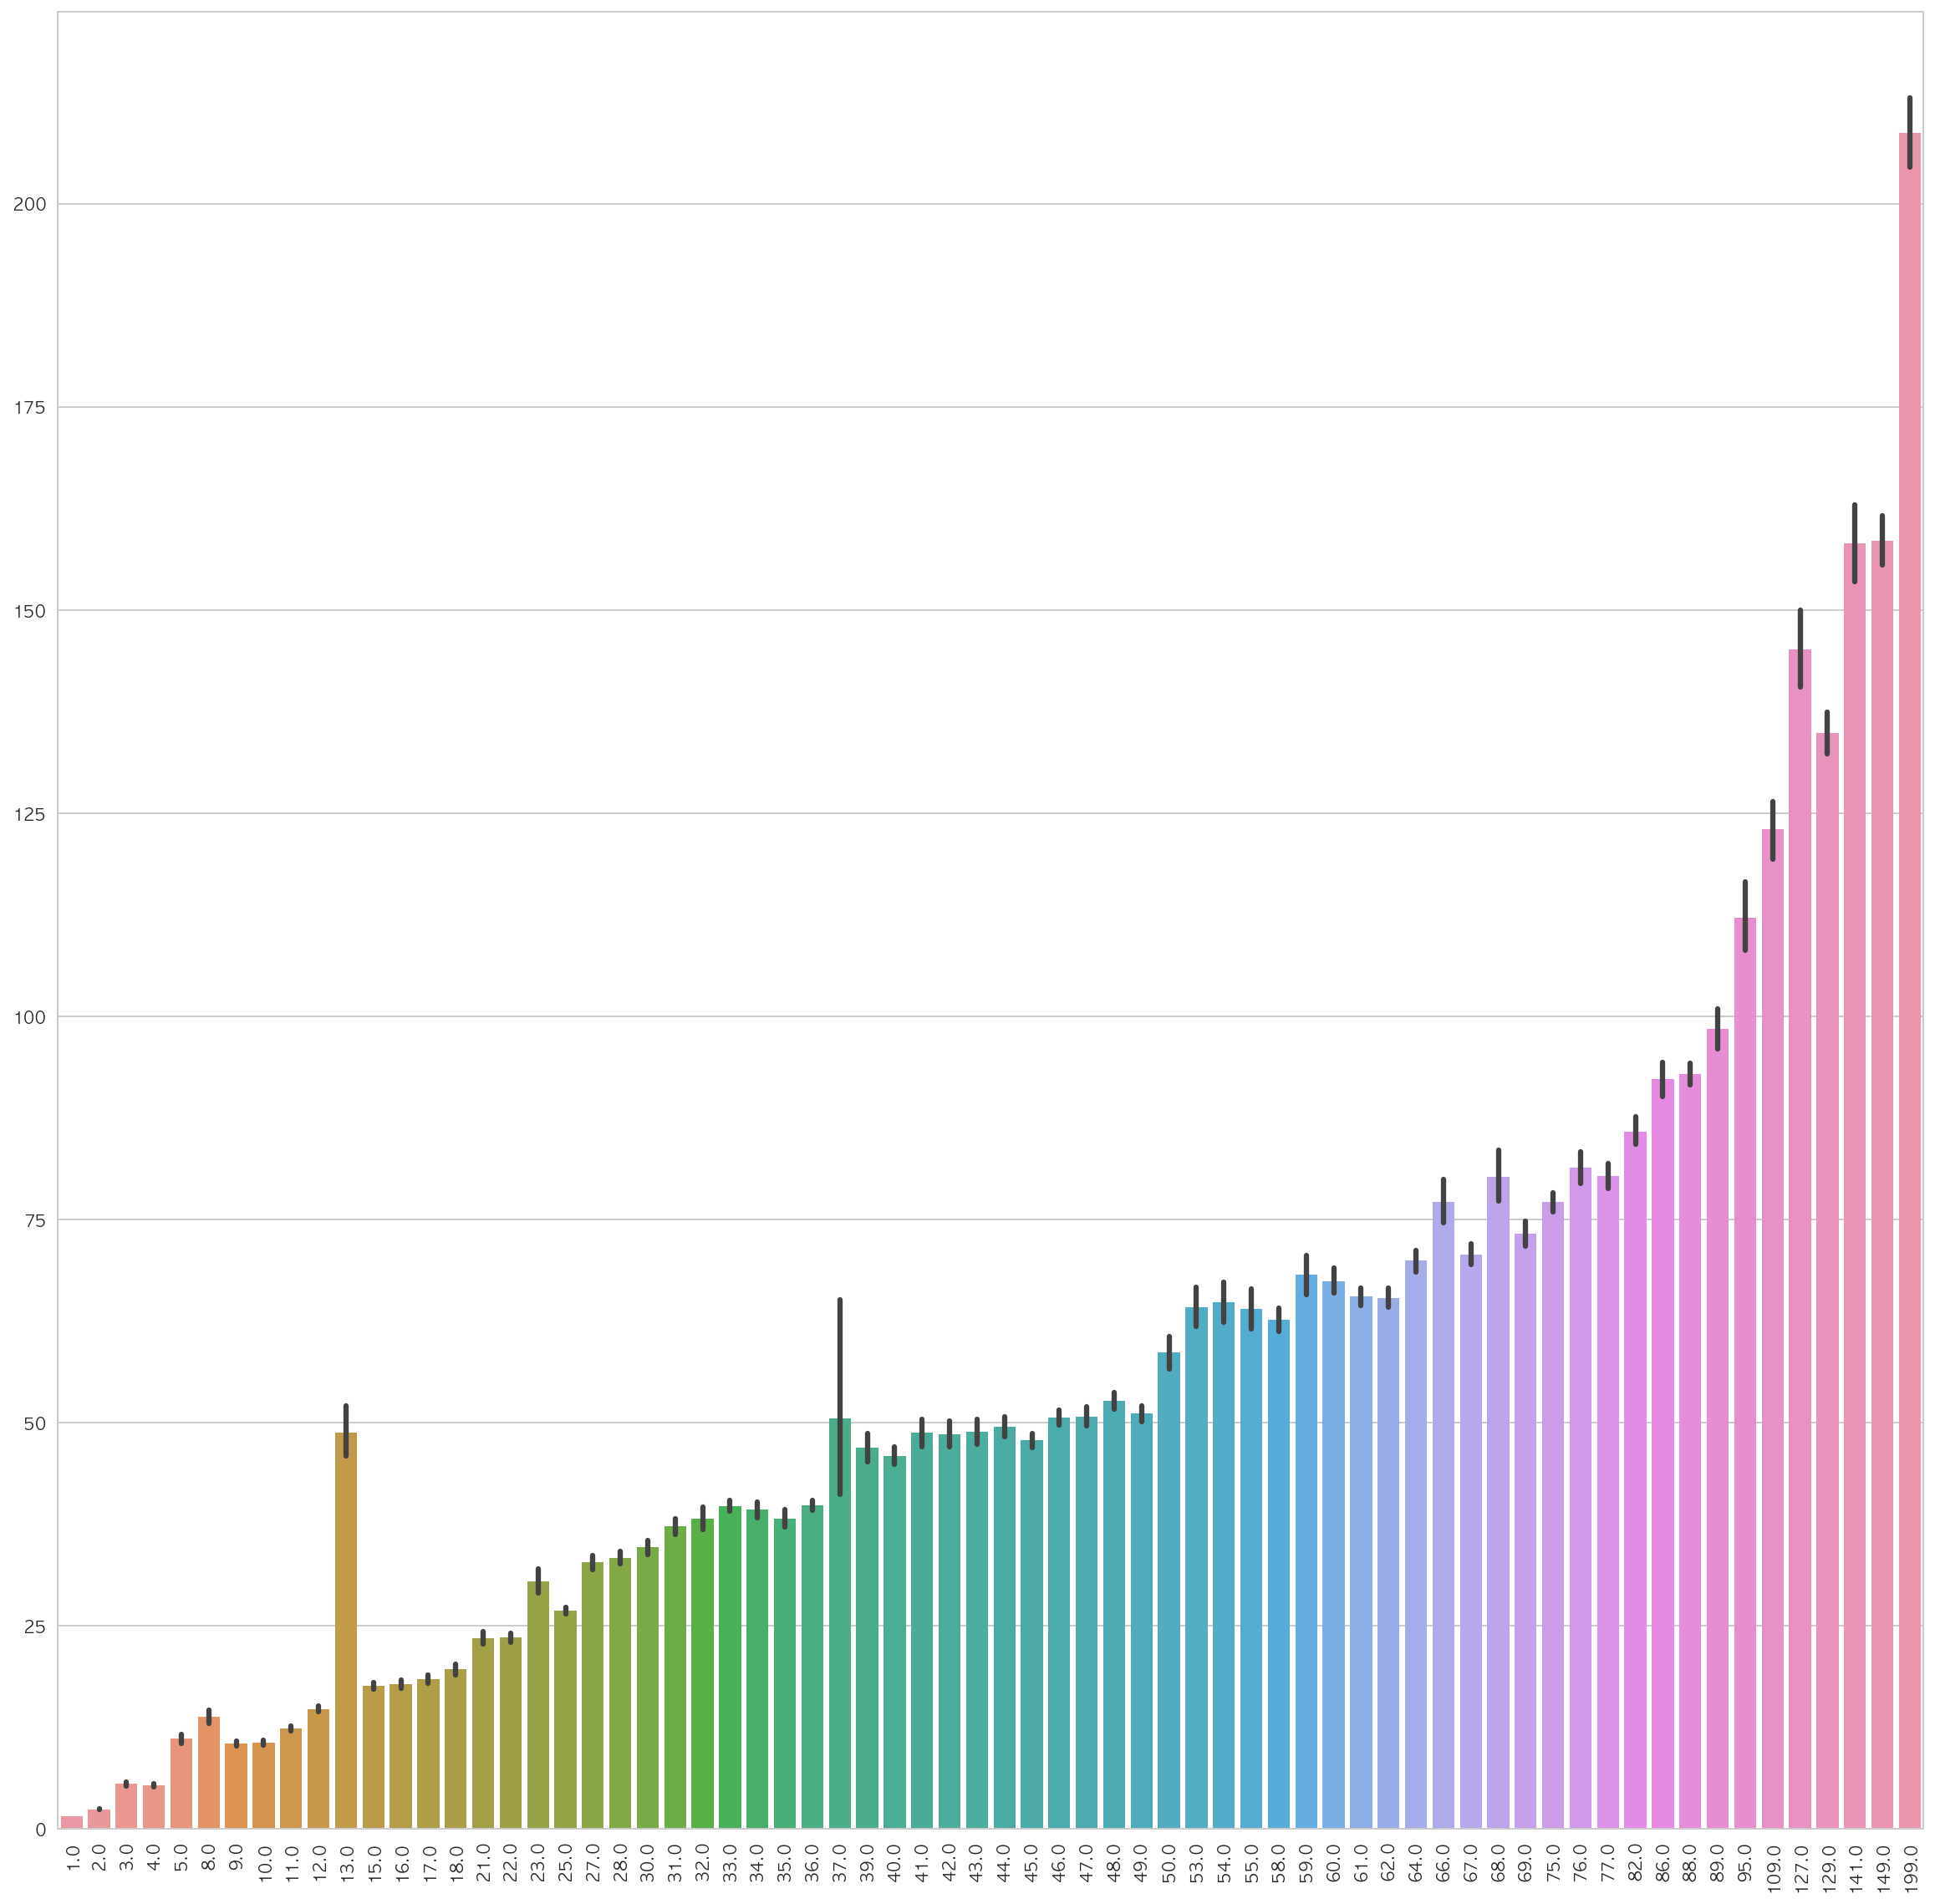

In [122]:
plt.figure(figsize=(20, 20))
sns.barplot(round(np.exp(ynew)), np.exp(df["log1p"]))
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation='90')
plt.show()

In [109]:
np.log1p(1)

0.6931471805599453

In [101]:
ynew.describe()

count    236038.000000
mean          1.476372
std           1.653917
min           0.021471
25%           0.211207
50%           0.403921
75%           3.336338
max           5.292938
dtype: float64

In [86]:
df_1["log1p"].sum()

354.39326633316887

In [93]:
matrix_df_1.sum()

0    964.0
dtype: float64

In [84]:
df_1["log1p"].shape, matrix_df_1.shape

((964,), (964, 1))

In [95]:
result = model_1.fit()

In [96]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     438.0
Date:                Wed, 11 Jul 2018   Prob (F-statistic):               0.00
Time:                        18:08:35   Log-Likelihood:            -4.5881e+05
No. Observations:              236038   AIC:                         9.177e+05
Df Residuals:                  235993   BIC:                         9.182e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.8193      0.020     41.784      0.0